In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import matplotlib
import string
import os.path
import statsmodels.api as sm
from copy import deepcopy
import attr

import rpy2.robjects as ro
Rload = ro.r('readRDS')
from rpy2.robjects import pandas2ri
pandas2ri.activate()

from uncertaintyFunctions import *
from constants import *

%matplotlib inline

/Users/naomi/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
font = {'family' : 'serif',
        'serif' : 'Times',
        'weight' : 'normal',
        'size'   : 12}

matplotlib.rc('font', **font)

## First, global mean annual mean temperature 

## To make a plot with all default options, here is the minimum that you need to specify.

In [ ]:
field = 'tas'
region = 'global'

options = defaults()

nColumns = 2
fig, ax = plt.subplots(nrows=options.nRows,ncols=nColumns,figsize=(2.5*nColumns,2.5*options.nRows))

column = 0
plotColumn(ax,column,field,region,options)


### Note that nColumns must be >=2 or the axes object will not have the correct dimensions that some of the functions expect.

## Now plot this for several methods and sets of input data, using confidence intervals and an extra row of plots of the input time-series, spaghetti plot style for all four scenarios.

/Users/naomi/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


internal variance CMIP5  , N= 278 :  0.00342256201724  range:  0.00266998970411 0.00421011288183
internal variance CMIP5 -all+LE , N= 318 :  0.00378118319514  range:  0.00309757442126 0.00452584338984
internal variance CMIP5 -1run+LE , N= 159 :  0.00495194931947  range:  0.00292663037588 0.00698608414626
internal variance H&S smoothed method, N= 68 :  0.00676566882582
internal variance H&S default method, N= 68 :  0.00442696276249


/Users/naomi/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family [u'serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


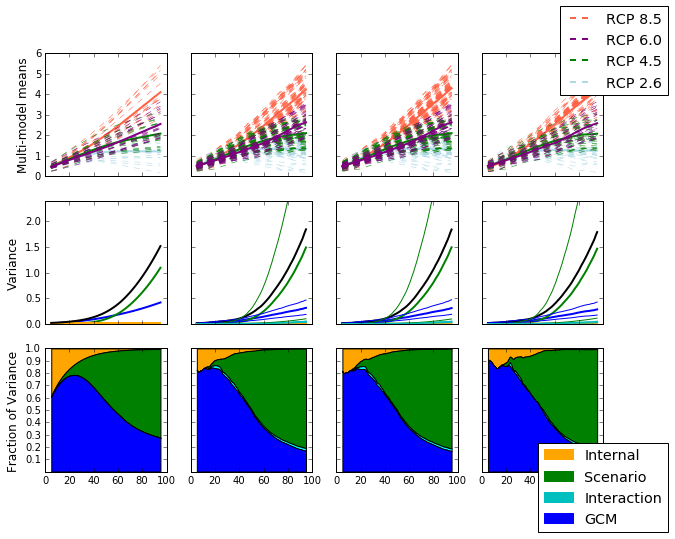

In [3]:
field = 'tas'
region = 'global'

options = defaults(nRows=3,season='annual',confidenceIntervals=True,ylimVariance=[0,2.4], \
                  ylimMeanRow=[0,6],spaghetti=True,scenarios=['rcp85','rcp26','rcp45','rcp60'])

nColumns = 4
fig, ax = plt.subplots(nrows=options.nRows,ncols=nColumns,
                       figsize=(2.5*nColumns,2.5*options.nRows))

column = 1
plotColumn(ax,column,field,region,options)
column = 2
options.ensemble='-all+LE'
attr.validate(options)
plotColumn(ax,column,field,region,options)
column = 3
options.ensemble='-1run+LE'
attr.validate(options)
plotColumn(ax,column,field,region,options)

column = 0
options.HandS=True
attr.validate(options)
plotColumn(ax,column,field,region,options)
#also print the value gotten with the H&S 4th order polynomial:
options.internal='default'
anomaly = getAnomaly(field,region,options)
internalComponent, modelComponent, scenarioComponent, smoothed = getVariancesHandS(region,anomaly,options)

plotLegend(fig)

### The only options for nRows are 2 or 3. Three will give you the extra row at the top.
### Note that if you plot multiple columns, axis ticks are only labeled on the left-most, but all the columns might have (unlabeled) different y-scales. For this reason you should specify ylimVariance, and ylimMeanRow (if there's an extra first row), so that all columns have the same y-limits for a given row.

## For fun, let's print the variance between runs by model for one scenario.

In [ ]:
smoothed = getSmoothed('tas','global',defaults()) 

for model in smoothed['rcp85'].transpose().index.get_level_values('model').unique():
    numRuns = smoothed['rcp85'][model].transpose().count().mode()[0]
    if numRuns > 1:
        print model, ' \t', numRuns, '\t', smoothed['2000':'2100']['rcp85'][model].transpose().var().mean()
    

## And the number of runs by model for each scenario

In [ ]:
smoothed = getSmoothed('tas','global',defaults()) 

byModel = smoothed['20000101'::].transpose().groupby(level='model')
#construct a model list
modelList = list(smoothed.columns.levels[1]) 
print "num models: ", len(modelList)
print modelList
for model in modelList:
    print model, ": \t \t", len(list(smoothed['rcp85'][model].columns)), '\t', \
            len(list(smoothed['rcp60'][model].columns)), '\t', \
            len(list(smoothed['rcp45'][model].columns)), '\t', \
            len(list(smoothed['rcp26'][model].columns))

In [ ]:
##list scenarios that exist for a given model
#smoothed.swaplevel(0,1,axis=1).swaplevel(1,2,axis=1)['ACCESS1-0']['run1'].columns.values

##list models that exist for a given scenario
#smoothed.swaplevel(1,2,axis=1)['rcp26']['run1'].columns.values

##list all runs that exist for a model/scenario pair:
#len(smoothed['rcp26']['GISS-E2-H'].columns.values)

## Global mean annual mean Precipitation

In [ ]:
field = 'pr'
region = 'global'

options=defaults(nRows=3,confidenceIntervals=True,ylimVariance=[0,0.0045],ylimMeanRow=[0,0.35],
                spaghetti=True,scenarios=['rcp85','rcp26','rcp45','rcp60'])

nColumns = 4
fig, ax = plt.subplots(nrows=options.nRows,ncols=nColumns,figsize=(2.5*nColumns,2.5*options.nRows))

column = 1
plotColumn(ax,column,field,region,options)
column = 2
options.ensemble='-all+LE'
attr.validate(options)
plotColumn(ax,column,field,region,options)
column = 3
options.ensemble='-1run+LE'
attr.validate(options)
plotColumn(ax,column,field,region,options)

column = 0
options.HandS=True
attr.validate(options)
plotColumn(ax,column,field,region,options)
#also print the value gotten with the H&S 4th order polynomial:
options.internal='default'
anomaly = getAnomaly(field,region,options)
internalComponent, modelComponent, scenarioComponent, smoothed = getVariancesHandS(region,anomaly,options)

plotLegend(fig)

## Annual mean, NW temperature:

In [ ]:
field = 'tas'
region = 'pnw'

options = defaults(nRows=3,season='annual',confidenceIntervals=True,ylimVariance=[0,3.5], \
                  ylimMeanRow=[-1,8],spaghetti=True,scenarios=['rcp85','rcp26','rcp45','rcp60'])

nColumns = 4
fig, ax = plt.subplots(nrows=options.nRows,ncols=nColumns,figsize=(2.5*nColumns,2.5*options.nRows))

column = 1
plotColumn(ax,column,field,region,options)
column = 2
options.ensemble='-all+LE'
attr.validate(options)
plotColumn(ax,column,field,region,options)
column = 3
options.ensemble='-1run+LE'
attr.validate(options)
plotColumn(ax,column,field,region,options)

column = 0
options.HandS=True
attr.validate(options)
plotColumn(ax,column,field,region,options)
#also print the value gotten with the H&S 4th order polynomial:
options.internal='default'
anomaly = getAnomaly(field,region,options)
internalComponent, modelComponent, scenarioComponent, smoothed = getVariancesHandS(region,anomaly,options)


In [ ]:
field = 'tas'
region = 'pnw'

options = defaults(nRows=2,season='annual',confidenceIntervals=True,ylimVariance=[0,3.5])

nColumns = 4
fig, ax = plt.subplots(nrows=options.nRows,ncols=nColumns,figsize=(2.5*nColumns,2.5*options.nRows))
letterSubfigures(ax)

column = 1
plotColumn(ax,column,field,region,options)
column = 2
options.ensemble='-all+LE'
attr.validate(options)
plotColumn(ax,column,field,region,options)
column = 3
options.ensemble='-1run+LE'
attr.validate(options)
plotColumn(ax,column,field,region,options)

column = 0
options.HandS=True
attr.validate(options)
plotColumn(ax,column,field,region,options)

#plt.savefig('figureS1final.eps')


# NW temperature with after-the-fact smoothing

In [ ]:
len(smoothed.columns)

In [ ]:
field = 'tas'
region = 'pnw'

options = defaults(nRows=2,season='annual',smooth=0.5,ylimVariance=[0,3.5])

nColumns = 4
fig, ax = plt.subplots(nrows=options.nRows,ncols=nColumns,figsize=(2.5*nColumns,2.5*options.nRows))
letterSubfigures(ax)

column = 1
plotColumn(ax,column,field,region,options)
column = 2
options.ensemble='-all+LE'
attr.validate(options)
plotColumn(ax,column,field,region,options)
column = 3
options.ensemble='-1run+LE'
attr.validate(options)
plotColumn(ax,column,field,region,options)

column = 0
options.HandS=True
attr.validate(options)
plotColumn(ax,column,field,region,options)

#plt.savefig('figure1final.eps')


## Now, annual mean NW precipitation

In [ ]:
field = 'pr'
region = 'pnw'

options = defaults(nRows=3,confidenceIntervals=True,ylimVariance=[0,0.035], \
                   ylimMeanRow=[-0.6,0.8],spaghetti=True)

nColumns = 4
fig, ax = plt.subplots(nrows=options.nRows,ncols=nColumns,figsize=(2.5*nColumns,2.5*options.nRows))

column = 1
plotColumn(ax,column,field,region,options)
column = 2
options.ensemble='-all+LE'
attr.validate(options)
plotColumn(ax,column,field,region,options)
column = 3
options.ensemble='-1run+LE'
attr.validate(options)
plotColumn(ax,column,field,region,options)

column = 0
options.HandS=True
attr.validate(options)
plotColumn(ax,column,field,region,options)

plotLegend(fig)

### Version for paper supplement:

In [ ]:
field = 'pr'
region = 'pnw'

options = defaults(nRows=2,confidenceIntervals=True,ylimVariance=[0,0.035])

nColumns = 4
fig, ax = plt.subplots(nrows=options.nRows,ncols=nColumns,figsize=(2.5*nColumns,2.5*options.nRows))
letterSubfigures(ax)

column = 1
plotColumn(ax,column,field,region,options)
column = 2
options.ensemble='-all+LE'
attr.validate(options)
plotColumn(ax,column,field,region,options)
column = 3
options.ensemble='-1run+LE'
attr.validate(options)
plotColumn(ax,column,field,region,options)

column = 0
options.HandS=True
attr.validate(options)
plotColumn(ax,column,field,region,options)

#plt.savefig('figureS2final.eps')


### Version for paper:

In [ ]:
field = 'pr'
region = 'pnw'

options = defaults(nRows=2,smooth=0.5,ylimVariance=[0,0.035])

nColumns = 4
fig, ax = plt.subplots(nrows=options.nRows,ncols=nColumns,figsize=(2.5*nColumns,2.5*options.nRows))
letterSubfigures(ax)

column = 1
plotColumn(ax,column,field,region,options)
column = 2
options.ensemble='-all+LE'
attr.validate(options)
plotColumn(ax,column,field,region,options)
column = 3
options.ensemble='-1run+LE'
attr.validate(options)
plotColumn(ax,column,field,region,options)

column = 0
options.HandS=True
attr.validate(options)
plotColumn(ax,column,field,region,options)

#plt.savefig('figure2final.eps')


## Figure out what after-the-fact smoothing to use on the N&C decadal results

In [ ]:
field = 'pr'
region = 'pnw'

options = defaults(nRows=2,ylimVariance=[0,0.04],ensemble='-all+LE')

nColumns = 4
fig, ax = plt.subplots(nrows=options.nRows,ncols=nColumns,figsize=(2.5*nColumns,2.5*options.nRows))

column = 0
plotColumn(ax,column,field,region,options)

column = 1
options.smooth=0.1
plotColumn(ax,column,field,region,options)

column = 2
options.smooth=0.3
plotColumn(ax,column,field,region,options)

column = 3
options.smooth=0.5
plotColumn(ax,column,field,region,options)

## Hawkins and Sutton results with a) 4th order polynomial, b) Lowess filter

In [ ]:
field = 'pr'
region = 'pnw'

options = defaults(nRows=3,ylimVariance=[0,0.05],ylimMeanRow=[-0.3,0.5],spaghetti=True, \
                  scenarios=['rcp85','rcp26','rcp45','rcp60'],HandS=True,internal='default')

nColumns = 2
fig, ax = plt.subplots(nrows=options.nRows,ncols=nColumns,figsize=(2.5*nColumns,2.5*options.nRows))
letterSubfigures(ax)

column = 0
plotColumn(ax,column,field,region,options)
column = 1
options.internal='smoothed'
plotColumn(ax,column,field,region,options)


## Seasons NW Precipitation: DJF, JJA
## CMIP5, all runs + CESM LE (combined ensemble)

In [ ]:
field = 'pr'
region = 'pnw'

options = defaults(nRows=3,confidenceIntervals=True,ylimVariance=[0,0.2], \
                   ylimMeanRow=[-0.4,1.0],ensemble='-all+LE')

nColumns = 2
fig, ax = plt.subplots(nrows=options.nRows,ncols=nColumns,figsize=(2.5*nColumns,2.5*options.nRows))
letterSubfigures(ax)

column = 0
options.season='DJF'
plotColumn(ax,column,field,region,options)
column = 1
options.season='JJA'
plotColumn(ax,column,field,region,options)

#plt.savefig('figureS3final.pdf')

### The multimodel means with standard deviation shading for each scenario are the default for the top row (spaghetti=False)

### Version for paper:

In [ ]:
field = 'pr'
region = 'pnw'

options = defaults(nRows=2,smooth=0.5,ylimVariance=[0,0.2],ensemble='-all+LE')

nColumns = 2
fig, ax = plt.subplots(nrows=options.nRows,ncols=nColumns,figsize=(2.5*nColumns,2.5*options.nRows))
letterSubfigures(ax)

column = 0
options.season='DJF'
plotColumn(ax,column,field,region,options)
column = 1
options.season='JJA'
plotColumn(ax,column,field,region,options)

#plt.savefig('figure3final.eps')

## Now, annual mean precipitation for all the regions:

### Version for supplement:

In [ ]:
field = 'pr'

options = defaults(nRows=3,confidenceIntervals=True,ylimVariance=[0,0.07], \
                   ylimMeanRow=[-0.4,0.9],ensemble='-all+LE')

nColumns = 5
fig, ax = plt.subplots(nrows=options.nRows,ncols=nColumns,figsize=(2.5*nColumns,2.5*options.nRows))
letterSubfigures(ax)

column = 0
plotColumn(ax,column,field,'Alaska',options)
column = 1
plotColumn(ax,column,field,'BC',options)
column = 2
plotColumn(ax,column,field,'pnw',options)
column = 3
plotColumn(ax,column,field,'Cali',options)
column = 4
plotColumn(ax,column,field,'Baja',options)

#plt.savefig('figureS4final.pdf')

## afterwards smoothing, precip all regions

In [ ]:
field = 'pr'

options = defaults(nRows=2,smooth=0.5,ylimVariance=[0,0.07],ensemble='-all+LE')

nColumns = 5
fig, ax = plt.subplots(nrows=options.nRows,ncols=nColumns,figsize=(2.5*nColumns,2.5*options.nRows))
letterSubfigures(ax)

column = 0
plotColumn(ax,column,field,'Alaska',options)
column = 1
plotColumn(ax,column,field,'BC',options)
column = 2
plotColumn(ax,column,field,'pnw',options)
column = 3
plotColumn(ax,column,field,'Cali',options)
column = 4
plotColumn(ax,column,field,'Baja',options)

#plt.savefig('figure4final.eps')

## the version generated with the informative prior for scenario using BUGS:

In [ ]:
field = 'pr'

options = defaults(nRows=3,smooth=0.5,ylimVariance=[0,0.08],ylimMeanRow=[-0.4,0.9], \
                   ensemble='-all+LE',append='-Bayes')

nColumns = 5
fig, ax = plt.subplots(nrows=options.nRows,ncols=nColumns,figsize=(2.5*nColumns,2.5*options.nRows))
letterSubfigures(ax)

column = 0
plotColumn(ax,column,field,'Alaska',options)
column = 1
plotColumn(ax,column,field,'BC',options)
column = 2
plotColumn(ax,column,field,'pnw',options)
column = 3
plotColumn(ax,column,field,'Cali',options)
column = 4
plotColumn(ax,column,field,'Baja',options)


## Temperature all regions

In [ ]:
field = 'tas'

options = defaults(nRows=3,ylimVariance=[0,8], \
                   ylimMeanRow=[0,10],ensemble='-all+LE')

nColumns = 5
fig, ax = plt.subplots(nrows=options.nRows,ncols=nColumns,figsize=(2.5*nColumns,2.5*options.nRows))
letterSubfigures(ax)

column = 0
plotColumn(ax,column,field,'Alaska',options)
column = 1
plotColumn(ax,column,field,'BC',options)
column = 2
plotColumn(ax,column,field,'pnw',options)
column = 3
plotColumn(ax,column,field,'Cali',options)
column = 4
plotColumn(ax,column,field,'Baja',options)

